In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# player_url = "Curry_Stephen"
# player_url = "Thompson_Klay"
player_url = "Kevin_Durant"
# player_url = "Green_Draymond"
# player_url = "James_LeBron"
# player_url = "DeRozan_DeMar"
# player_url = "Westbrook_Russell"
# player_url = "Gobert_Rudy"
# player_url = "Mills_Patty"
# player_url = "Simmons_Jonathon"

In [3]:
count = 0
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.startswith(player_url):
        count += 1
        print count, file

1 Kevin_Durant_2015.csv
2 Kevin_Durant_2016.csv
3 Kevin_Durant_2017.csv


In [4]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.startswith(player_url):
        filepath = "./basketball_reference/game_logs/" + file
        print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

./basketball_reference/game_logs/Kevin_Durant_2015.csv
./basketball_reference/game_logs/Kevin_Durant_2016.csv
./basketball_reference/game_logs/Kevin_Durant_2017.csv


In [5]:
df.tail()

,game,playoff,date,team,loc,opp,result,gs,mp,fg,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
65,4,/play-index/pgl_cum_stats.cgi?player=duranke01...,2017-05-04,GSW,NaN,UTA,W (+11),1,36:00,6,...,34.1,17.1,27.5,1.3,2.6,4.9,24.8,140,103,Kevin Durant
66,5,/play-index/pgl_cum_stats.cgi?player=duranke01...,2017-05-06,GSW,@,UTA,W (+11),1,38:59,15,...,28.2,17.2,6.6,1.3,2.2,6.7,36.2,128,94,Kevin Durant
67,6,/play-index/pgl_cum_stats.cgi?player=duranke01...,2017-05-08,GSW,@,UTA,W (+26),1,30:02,7,...,11.8,10.4,25.1,0.0,0.0,0.0,22.9,133,102,Kevin Durant
68,7,/play-index/pgl_cum_stats.cgi?player=duranke01...,2017-05-14,GSW,NaN,SAS,W (+2),1,38:32,11,...,9.3,7.8,19.7,1.3,8.0,10.2,31.8,136,118,Kevin Durant
69,8,/play-index/pgl_cum_stats.cgi?player=duranke01...,2017-05-16,GSW,NaN,SAS,W (+36),1,27:50,6,...,6.2,3.9,13.0,0.0,2.2,15.5,19.6,124,109,Kevin Durant


In [6]:
df = df.reset_index()

In [7]:
df

,index,game,playoff,date,team,loc,opp,result,gs,mp,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
0,0,1,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-02,OKC,@,NOP,L (-8),1,29:34,...,9.4,5.2,14.5,0.0,0.0,19.2,37.5,106,115,Kevin Durant
1,1,2,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-05,OKC,@,PHI,W (+12),1,29:08,...,18.7,11.8,16.4,0.0,2.9,13.6,24.2,80,98,Kevin Durant
2,2,3,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-07,OKC,@,DET,W (+2),1,29:28,...,15.5,7.3,28.7,1.8,0.0,8.2,36.5,128,104,Kevin Durant
3,3,4,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-09,OKC,NaN,MIL,W (+13),1,28:56,...,31.1,17.6,39.5,1.7,2.6,21.6,26.3,138,97,Kevin Durant
4,4,5,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-11,OKC,NaN,CLE,W (+9),1,30:07,...,19.1,10.2,28.0,3.4,5.6,15.3,29.1,109,94,Kevin Durant
5,5,6,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-12,OKC,@,MIN,W (+19),1,28:22,...,12.7,8.7,23.2,0.0,4.8,37.0,24.1,110,100,Kevin Durant
6,6,7,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-14,OKC,NaN,PHO,W (+24),1,24:20,...,25.0,15.3,17.0,4.0,2.9,20.4,34.3,121,78,Kevin Durant
7,7,8,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-16,OKC,@,SAC,W (+12),1,35:17,...,9.7,4.6,11.0,1.5,0.0,7.1,35.8,97,104,Kevin Durant
8,8,9,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-18,OKC,@,GSW,L (-5),1,18:44,...,11.4,6.2,33.3,0.0,4.1,11.1,41.5,158,118,Kevin Durant
9,9,10,/play-index/pgl_cum_stats.cgi?player=duranke01...,2014-12-31,OKC,NaN,PHO,W (+3),1,39:41,...,35.1,15.0,39.6,0.0,2.1,15.0,33.5,144,124,Kevin Durant


In [8]:
del df['index']

In [9]:
df.columns.values

array(['game', 'playoff', 'date', 'team', 'loc', 'opp', 'result', 'gs',
       'mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta',
       'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'orb_pct',
       'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'usg_pct', 'off_rtg', 'def_rtg', 'Name'], dtype=object)

In [10]:
# data cleaning for all game_log files
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'loc': 'Home_Game'}, inplace=True)
df['playoff'] = [0 if item[-1] == "N" else 1 for item in df['playoff']]
df['Home_Game'] = [0 if item == "@" else 1 for item in df['Home_Game']]
df['result'] = [item[3:].replace(")","") for item in df['result']]
df['result'] = df['result'].astype(float)
df['mp'] = [0 if pd.isnull(item) else round(float(item.split(":")[0]) + float(item.split(":")[1])/60. , 2) for item in df['mp']]

In [11]:
df.mp.max()

53.530000000000001

In [12]:
df[df['mp'] < 1].shape

(0, 42)

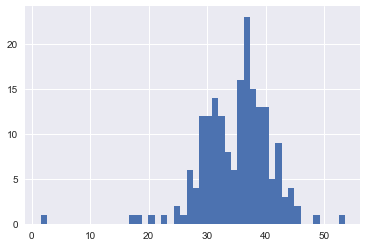

In [13]:
df['mp'].hist(bins = 48)

In [14]:
df = df[df['mp'] > 2]

In [15]:
df.shape

(186, 42)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 186
Data columns (total 42 columns):
game          186 non-null int64
playoff       186 non-null int64
date          186 non-null datetime64[ns]
team          186 non-null object
Home_Game     186 non-null int64
opp           186 non-null object
result        186 non-null float64
gs            186 non-null int64
mp            186 non-null float64
fg            186 non-null int64
fga           186 non-null int64
fg_pct        186 non-null float64
fg3           186 non-null int64
fg3a          186 non-null int64
fg3_pct       186 non-null float64
ft            186 non-null int64
fta           186 non-null int64
ft_pct        179 non-null float64
orb           186 non-null int64
drb           186 non-null int64
trb           186 non-null int64
ast           186 non-null int64
stl           186 non-null int64
blk           186 non-null int64
tov           186 non-null int64
pf            186 non-null int64
pts           18

In [17]:
del df['fg_pct']
del df['fg3_pct']
del df['ft_pct']
# del df['orb_pct']
# del df['plus_minus']

In [18]:
df = df.dropna(axis=0, how='any')

In [19]:
cols = list(df.columns.values[6:-1])

In [20]:
cols = [col for col in cols if col not in ['fg_pct','fg3_pct','ft_pct','pts']] + ['Home_Game', 'playoff'] 

In [21]:
cols

['result',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'gmsc',
 'plus_minus',
 'ts_pct',
 'eFG_pct',
 'orb_pct',
 'drb_pct',
 'trb_pct',
 'ast_pct',
 'stl_pct',
 'blk_pct',
 'tov_pct',
 'usg_pct',
 'off_rtg',
 'def_rtg',
 'Home_Game',
 'playoff']

In [22]:
df

,game,playoff,date,team,Home_Game,opp,result,gs,mp,fg,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
0,1,0,2014-12-02,OKC,0,NOP,-8.0,1,29.57,9,...,9.4,5.2,14.5,0.0,0.0,19.2,37.5,106,115,Kevin Durant
1,2,0,2014-12-05,OKC,0,PHI,12.0,1,29.13,3,...,18.7,11.8,16.4,0.0,2.9,13.6,24.2,80,98,Kevin Durant
2,3,0,2014-12-07,OKC,0,DET,2.0,1,29.47,10,...,15.5,7.3,28.7,1.8,0.0,8.2,36.5,128,104,Kevin Durant
3,4,0,2014-12-09,OKC,1,MIL,13.0,1,28.93,7,...,31.1,17.6,39.5,1.7,2.6,21.6,26.3,138,97,Kevin Durant
4,5,0,2014-12-11,OKC,1,CLE,9.0,1,30.12,6,...,19.1,10.2,28.0,3.4,5.6,15.3,29.1,109,94,Kevin Durant
5,6,0,2014-12-12,OKC,0,MIN,19.0,1,28.37,5,...,12.7,8.7,23.2,0.0,4.8,37.0,24.1,110,100,Kevin Durant
6,7,0,2014-12-14,OKC,1,PHO,24.0,1,24.33,8,...,25.0,15.3,17.0,4.0,2.9,20.4,34.3,121,78,Kevin Durant
7,8,0,2014-12-16,OKC,0,SAC,12.0,1,35.28,12,...,9.7,4.6,11.0,1.5,0.0,7.1,35.8,97,104,Kevin Durant
8,9,0,2014-12-18,OKC,0,GSW,-5.0,1,18.73,10,...,11.4,6.2,33.3,0.0,4.1,11.1,41.5,158,118,Kevin Durant
9,10,0,2014-12-31,OKC,1,PHO,3.0,1,39.68,13,...,35.1,15.0,39.6,0.0,2.1,15.0,33.5,144,124,Kevin Durant


In [23]:
X = df[cols]

In [24]:
# setting y as win/loss
# y = [1 if result > 0 else 0 for result in X['result']]
# y = pd.DataFrame(y,columns=["result"])

# setting y as ppg
y = df['pts']

In [25]:
# interaction terms
import patsy
from sklearn.preprocessing import PolynomialFeatures

formula = "%s ~ (%s)**2" % ("result", " + ".join([col for col in cols[:5] if col not in ["result"]]))
yp, Xp = patsy.dmatrices(formula, data=df, return_type="dataframe")

Xp.head(1).values

array([[   1.  ,    1.  ,   29.57,    9.  ,   18.  ,   29.57,    9.  ,
          18.  ,  266.13,  532.26,  162.  ]])

In [26]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(Xp[Xp.columns[:5]].values)[0]

array([   1.    ,    1.    ,    1.    ,   29.57  ,    9.    ,   18.    ,
          1.    ,    1.    ,   29.57  ,    9.    ,   18.    ,    1.    ,
         29.57  ,    9.    ,   18.    ,  874.3849,  266.13  ,  532.26  ,
         81.    ,  162.    ,  324.    ])

In [27]:
X.head(1).values

array([[  -8.   ,    1.   ,   29.57 ,    9.   ,   18.   ,    3.   ,
           8.   ,    6.   ,    7.   ,    0.   ,    3.   ,    3.   ,
           2.   ,    0.   ,    0.   ,    5.   ,    2.   ,   14.1  ,
          -8.   ,    0.64 ,    0.583,    0.   ,    9.4  ,    5.2  ,
          14.5  ,    0.   ,    0.   ,   19.2  ,   37.5  ,  106.   ,
         115.   ,    0.   ,    0.   ]])

In [28]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb',\
#                 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus']])
# plt.show()

In [29]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.pairplot(X[['result', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',\
#                 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'Home_Game']])
# plt.show()

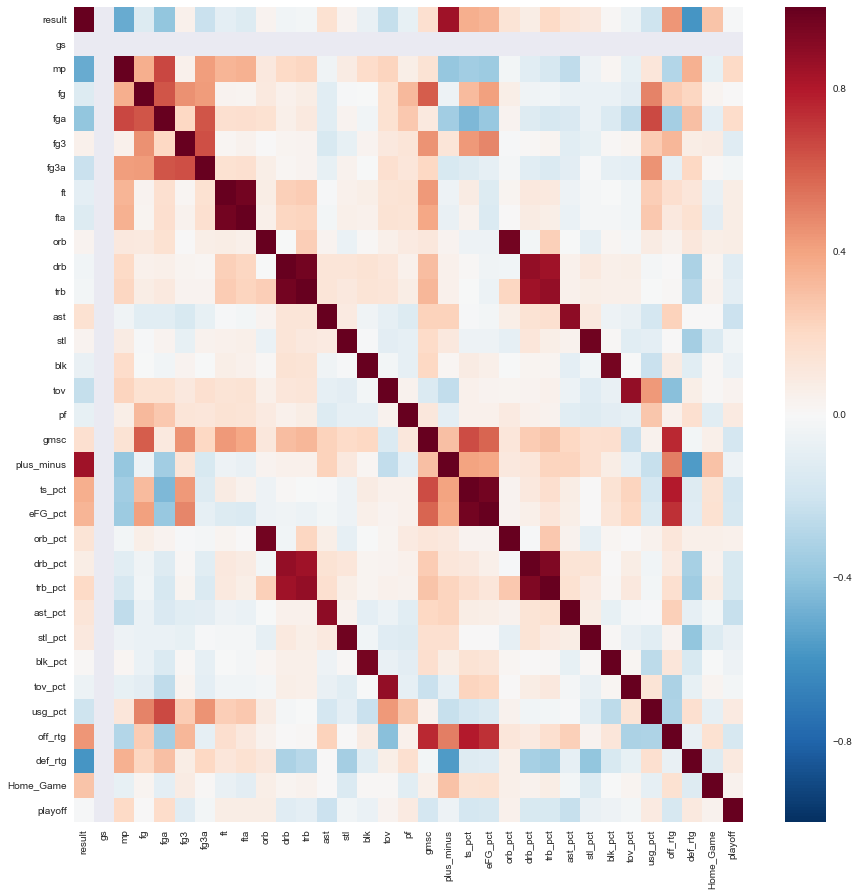

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [31]:
X.corr()['result'].sort_values(ascending=False)

result        1.000000
plus_minus    0.849083
off_rtg       0.444316
ts_pct        0.362398
eFG_pct       0.341172
Home_Game     0.288107
trb_pct       0.195663
gmsc          0.156946
ast           0.150442
orb_pct       0.135057
ast_pct       0.132054
stl_pct       0.107786
drb_pct       0.071823
fg3           0.046923
stl           0.038452
orb           0.031684
blk_pct       0.012202
playoff      -0.013658
trb          -0.024862
drb          -0.034040
tov_pct      -0.057417
blk          -0.072189
pf           -0.084448
ft           -0.098478
fg           -0.137891
fta          -0.140275
usg_pct      -0.210330
fg3a         -0.221813
tov          -0.240675
fga          -0.390918
mp           -0.500292
def_rtg      -0.592009
gs                 NaN
Name: result, dtype: float64

In [32]:
del X['result']
del X['gs']
# del X['plus_minus']

In [33]:
X.shape

(186, 31)

In [34]:
y.shape

(186,)

In [35]:
# checking for nan's
count = 0
for col in X.columns:
    for i, row in enumerate(X[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
Xs = StandardScaler().fit_transform(X)

In [38]:
Xs = pd.DataFrame(Xs, columns=X.columns)

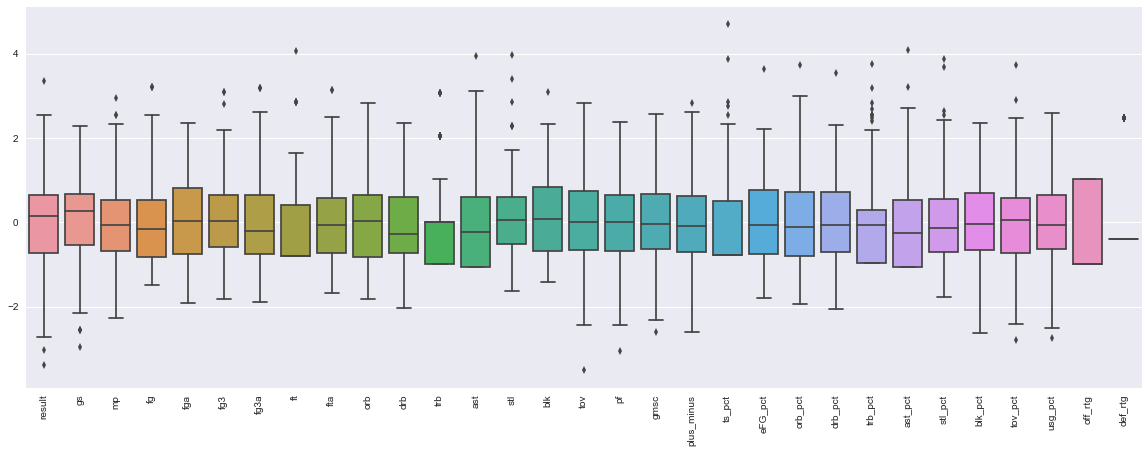

In [39]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [40]:
opponents = pd.concat([df[(df['opp'] == "SAS")], df[-5:]])#['pts']
# df[(df['opp'] == "SAS") & (df['Home_Game'] == 1)]['pts'].mean()
opponents

,game,playoff,date,team,Home_Game,opp,result,gs,mp,fg,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Name
27,1,0,2015-10-28,OKC,1,SAS,6.0,1,34.50,6,...,20.4,10.3,0.0,0.0,0.0,4.3,28.5,105,108,Kevin Durant
85,59,0,2016-03-12,OKC,0,SAS,-8.0,1,37.22,11,...,10.1,5.2,61.4,1.4,2.1,9.8,35.6,111,103,Kevin Durant
92,66,0,2016-03-26,OKC,1,SAS,19.0,1,31.70,13,...,29.0,18.7,18.7,0.0,0.0,20.0,34.4,128,100,Kevin Durant
104,6,1,2016-04-30,OKC,0,SAS,-32.0,1,32.92,6,...,31.9,14.4,33.3,0.0,0.0,5.6,24.8,107,136,Kevin Durant
105,7,1,2016-05-02,OKC,0,SAS,1.0,1,42.07,11,...,16.6,9.4,17.9,0.0,1.6,19.1,28.1,113,105,Kevin Durant
106,8,1,2016-05-06,OKC,1,SAS,-4.0,1,41.73,10,...,16.4,7.3,15.3,1.3,2.0,19.5,28.1,107,109,Kevin Durant
107,9,1,2016-05-08,OKC,1,SAS,14.0,1,43.38,14,...,11.3,7.5,18.1,1.2,0.0,14.0,38.1,122,108,Kevin Durant
108,10,1,2016-05-10,OKC,0,SAS,4.0,1,42.67,8,...,11.5,7.5,22.5,2.5,1.6,17.5,29.4,98,100,Kevin Durant
109,11,1,2016-05-12,OKC,1,SAS,14.0,1,42.68,12,...,22.0,11.2,8.5,0.0,0.0,6.4,32.4,130,108,Kevin Durant
117,1,0,2016-10-25,GSW,1,SAS,-29.0,1,36.60,11,...,27.3,14.6,20.5,2.7,3.5,0.0,24.3,139,121,Kevin Durant


In [41]:
# setting testing data based on team opponent and last 5 games
mask = opponents.index.values

# setting training data as all data from player
X_train = df[cols]
y_train = df[['pts']]
X_test = df.ix[mask,:][cols]
y_test = df.ix[mask,:][['pts']]

In [42]:
from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.7, random_state=8)

# X_train = df[df['date'].map(lambda x: x.year) != 2017][cols]
# y_train = df[df['date'].map(lambda x: x.year) != 2017][['pts']]
# X_test = df[df['date'].map(lambda x: x.year) == 2017][cols]
# y_test = df[df['date'].map(lambda x: x.year) == 2017][['pts']]

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(186, 33) (186, 1) (17, 33) (17, 1)


In [44]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [45]:
dtr = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)

In [46]:
cross_val_score(dtr, X_train, np.ravel(y_train), cv=5)

array([ 0.71026873,  0.57787805,  0.6213159 ,  0.71094433,  0.67986696])

In [47]:
print dtr.score(X_train, y_train)
print dtr.score(X_test, y_test)

0.813679029695
0.9092985066


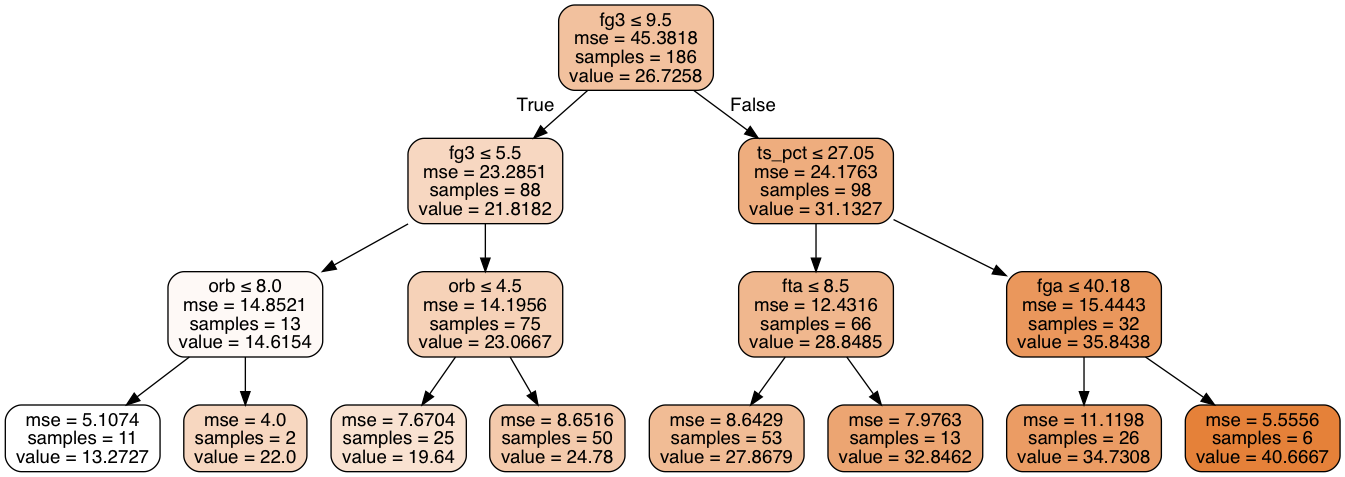

In [48]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [49]:
pd.DataFrame(dtr.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False).head()

,feature_importances
fg,0.700903
gmsc,0.153542
ft,0.082877
fg3a,0.037668
mp,0.025009


In [50]:
rfr = RandomForestRegressor(max_depth=3).fit(X_train, y_train)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [51]:
cross_val_score(rfr, X_train, np.ravel(y_train), cv=5)

array([ 0.84343974,  0.84640435,  0.79535312,  0.84607073,  0.75560096])

In [52]:
print rfr.score(X_train, y_train)
print rfr.score(X_test, y_test)

0.88347053495
0.942165532147


In [53]:
pd.DataFrame(rfr.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False).head(10)

,feature_importances
fg,0.706254
gmsc,0.147654
fta,0.039739
ft,0.032660
usg_pct,0.016900
mp,0.013915
fg3a,0.010840
fg3,0.005886
ast_pct,0.005030
fga,0.004872


In [54]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [55]:
lr = LinearRegression().fit(X_train, y_train)
linear_ppg = pd.DataFrame(lr.predict(X_test).ravel(), columns=['linear_ppg'], index=y_test.index)
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

1.0
1.0


In [56]:
pd.concat([pd.DataFrame(lr.coef_[0], index=X_test.columns, columns=['params']), pd.DataFrame(np.abs(lr.coef_[0]), index=X_test.columns, columns=['abs_params'])], axis=1).sort_values('abs_params', ascending=False)

,params,abs_params
fg,7.438818e-01,7.438818e-01
gmsc,5.233826e-01,5.233826e-01
tov,5.233826e-01,5.233826e-01
stl,-5.233826e-01,5.233826e-01
fg3,4.766174e-01,4.766174e-01
fga,3.663678e-01,3.663678e-01
ast,-3.663678e-01,3.663678e-01
blk,-3.663678e-01,3.663678e-01
ft,2.672644e-01,2.672644e-01
pf,2.093530e-01,2.093530e-01


In [57]:
lasso = Lasso().fit(X_train, y_train)
lasso_ppg = pd.DataFrame(lasso.predict(X_test).ravel(), columns=['lasso_ppg'], index=y_test.index)
print lasso.score(X_train, y_train)
print lasso.score(X_test, y_test)

0.967897705416
0.979424155035


In [58]:
lassoCV = LassoCV().fit(X_train, y_train)
lassoCV_ppg = pd.DataFrame(lassoCV.predict(X_test).ravel(), columns=['lassoCV_ppg'], index=y_test.index)
print lassoCV.score(X_train, y_train)
print lassoCV.score(X_test, y_test)

0.999845390872
0.999884885189


/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
ridge = Ridge().fit(X_train, y_train)
ridge_ppg = pd.DataFrame(ridge.predict(X_test).ravel(), columns=['ridge_ppg'], index=y_test.index)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)

0.999991286235
0.999994946245


In [60]:
ridgeCV = RidgeCV().fit(X_train, y_train)
ridgeCV_ppg = pd.DataFrame(ridgeCV.predict(X_test).ravel(), columns=['ridgeCV_ppg'], index=y_test.index)
print ridgeCV.score(X_train, y_train)
print ridgeCV.score(X_test, y_test)

0.999999880963
0.999999935839


In [61]:
ppg = pd.concat([y_test,linear_ppg, lasso_ppg, lassoCV_ppg, ridge_ppg, ridgeCV_ppg], axis=1)

In [62]:
ppg.head()

,pts,linear_ppg,lasso_ppg,lassoCV_ppg,ridge_ppg,ridgeCV_ppg
27,22,22.0,20.794262,21.877821,21.977285,21.997562
85,28,28.0,25.665612,27.816697,27.973468,27.996939
92,31,31.0,29.953249,30.919164,31.000293,31.000058
104,16,16.0,16.104361,15.951609,16.000023,16.000000
105,28,28.0,26.978246,27.936585,27.982977,27.997913


In [63]:
print (ppg['pts'] - ppg['linear_ppg']).mean()
print (ppg['pts'] - ppg['lasso_ppg']).mean()
print (ppg['pts'] - ppg['lassoCV_ppg']).mean()
print (ppg['pts'] - ppg['ridge_ppg']).mean()
print (ppg['pts'] - ppg['ridgeCV_ppg']).mean()

-3.13474736365e-15
0.597880345166
0.0403173250063
0.00197044865714
0.000308128538328


# re-run below to randomize

In [64]:
# randomly seeding data based on mean/std
seed = []
for i in range(1):
    row = []
    for col in cols:
        if col == "Home_Game":
            row.append(np.random.choice([0,1]))
        else:    
            std = X_test[col].std()
            if std == 0:
                row.append(0)
            else:
                row.append(np.random.normal(X_test[col].mean(), X_test[col].std()))
    seed.append(row)

In [65]:
# randomly seeding data based on mean/std from a given opponent
seed = []
for i in range(1):
    row = []
    for col in cols:
        if col == "Home_Game":
            row.append(0) # home game == 1, away game == 0
#             row.append(np.random.choice([0,1]))
        else:    
            std = X_test[col].std()
            if std == 0:
                row.append(0)
            else:
                row.append(X_test[col].mean())
    seed.append(row)

In [66]:
print ridge.score(X_test, y_test)
predicted = pd.DataFrame(seed, columns=X_test.columns)
predicted.head()

0.999994946245


,result,gs,mp,fg,fga,fg3,fg3a,ft,fta,orb,...,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,Home_Game,playoff
0,6.411765,0,36.658824,9.647059,18.764706,1.764706,5.294118,6.0,6.764706,0.705882,...,10.247059,20.047059,0.841176,2.117647,10.541176,28.847059,122.411765,108.882353,0,0.764706


In [67]:
print lr.predict(predicted).mean()
print lasso.predict(predicted).mean()
print lassoCV.predict(predicted).mean()
print ridge.predict(predicted).mean()
print ridgeCV.predict(predicted).mean()
print y_test['pts'].mean()

27.0588235294
26.4609431842
27.0185062044
27.0591356036
27.058806876
27.0588235294
